# Workshop 2: House Pricing Regression
In this workshop you will need to train a regression neural network to estimate the pricing of houses of California. The main blocks of the workshop are:

- Get the data from Keras repository and visualize it.
- Pre-process the data.
- Design the network.
- Train the network.
- Evaluate the model.

[Info of the data](https://www.kaggle.com/datasets/camnugent/california-housing-prices))

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

tf.random.set_seed(1234)

# 1. Get the data (Already in Colab)

In [2]:
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [3]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

In [4]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
train_data.shape, test_data.shape

((17000, 9), (3000, 9))

In [6]:
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17000, 8), (17000,), (3000, 8), (3000,))

# 2. Pre-process the data.

In [8]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(
    standard_scaler.fit_transform(x_train),
    columns=x_train.columns
)
x_test_scaled = pd.DataFrame(
    standard_scaler.transform(x_test),
    columns = x_test.columns
)

In [9]:
x_train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454


# 3. Design the network.

In [10]:
def create_model():
  model = Sequential([
      Dense(32, input_dim=8, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='linear')
    ])
  return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4513 (17.63 KB)
Trainable params: 4513 (17.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['mse']
)

# 4. Train the network.

In [13]:
history = model.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
213/213 [==============================] - 14s 17ms/step - loss: 51047309312.0000 - mse: 51047309312.0000 - val_loss: 76225036288.0000 - val_mse: 76225036288.0000
Epoch 2/10
213/213 [==============================] - 2s 11ms/step - loss: 42724216832.0000 - mse: 42724216832.0000 - val_loss: 65723465728.0000 - val_mse: 65723465728.0000
Epoch 3/10
213/213 [==============================] - 2s 8ms/step - loss: 19755366400.0000 - mse: 19755366400.0000 - val_loss: 49772306432.0000 - val_mse: 49772306432.0000
Epoch 4/10
213/213 [==============================] - 1s 7ms/step - loss: 12554963968.0000 - mse: 12554963968.0000 - val_loss: 40687267840.0000 - val_mse: 40687267840.0000
Epoch 5/10
213/213 [==============================] - 2s 7ms/step - loss: 10975030272.0000 - mse: 10975030272.0000 - val_loss: 33150720000.0000 - val_mse: 33150720000.0000
Epoch 6/10
213/213 [==============================] - 2s 7ms/step - loss: 9650366464.0000 - mse: 9650366464.0000 - val_loss: 26556383232.

In [14]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

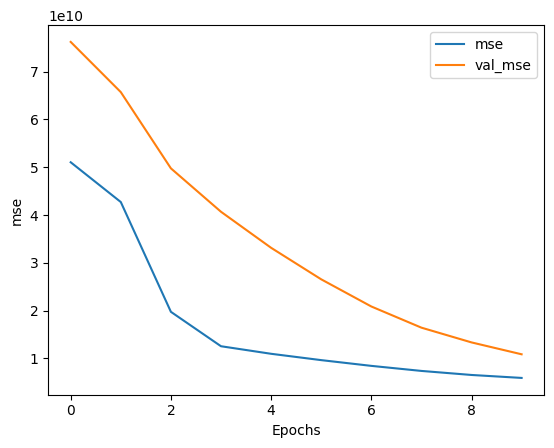

In [15]:
# Loss: MSE | Learnin Rate: 1e-03
plot_history(history, 'mse')

Epoch 1/10
213/213 [==============================] - 2s 5ms/step - loss: 23027054592.0000 - mse: 23027054592.0000 - val_loss: 14862544896.0000 - val_mse: 14862544896.0000
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 5150373888.0000 - mse: 5150373888.0000 - val_loss: 6617753088.0000 - val_mse: 6617753088.0000
Epoch 3/10
213/213 [==============================] - 1s 5ms/step - loss: 4343407616.0000 - mse: 4343407616.0000 - val_loss: 5625460224.0000 - val_mse: 5625460224.0000
Epoch 4/10
213/213 [==============================] - 1s 5ms/step - loss: 4210707968.0000 - mse: 4210707968.0000 - val_loss: 5423553536.0000 - val_mse: 5423553536.0000
Epoch 5/10
213/213 [==============================] - 1s 5ms/step - loss: 4134899712.0000 - mse: 4134899712.0000 - val_loss: 5468612096.0000 - val_mse: 5468612096.0000
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 4107074304.0000 - mse: 4107074304.0000 - val_loss: 5396822016.0000 - val_mse: 5396

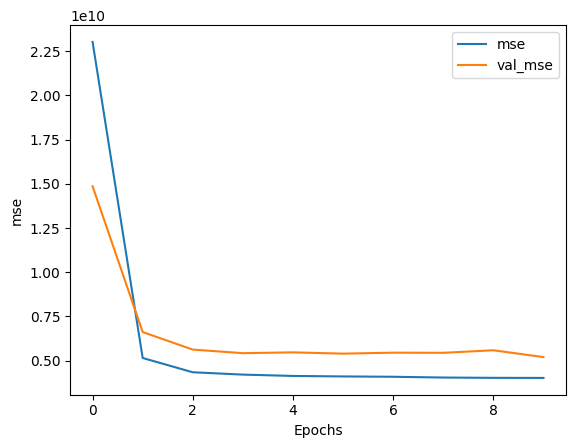

In [16]:
# Loss: MSE | Learnin Rate: 1e-02
model = create_model()
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=1e-2),
    metrics=['mse']
)
history = model.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'mse')

Epoch 1/10
213/213 [==============================] - 7s 6ms/step - loss: 75.0356 - msle: 75.0356 - val_loss: 51.8816 - val_msle: 51.8816
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 34.1078 - msle: 34.1078 - val_loss: 33.1655 - val_msle: 33.1655
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 21.7001 - msle: 21.7001 - val_loss: 24.0888 - val_msle: 24.0888
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 15.2277 - msle: 15.2277 - val_loss: 18.4481 - val_msle: 18.4481
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 11.1291 - msle: 11.1291 - val_loss: 14.5213 - val_msle: 14.5213
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 8.3572 - msle: 8.3572 - val_loss: 11.6907 - val_msle: 11.6907
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 6.4106 - msle: 6.4106 - val_loss: 9.5796 - val_msle: 9.5796
Epoch 8/10
213/213 [====================

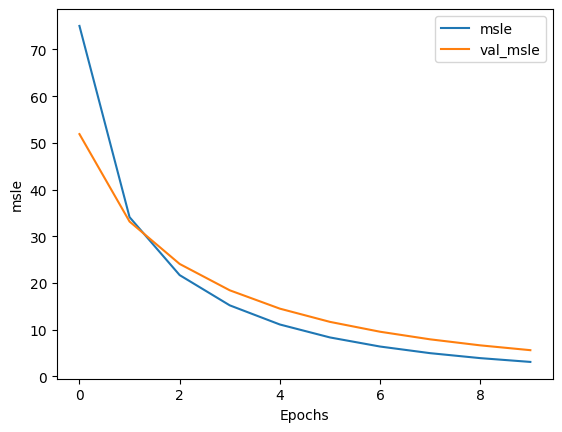

In [17]:
# Loss: MSLE | Learnin Rate: 1e-03
model = create_model()
model.compile(
    loss='msle',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

Epoch 1/10
213/213 [==============================] - 2s 6ms/step - loss: 22.0534 - msle: 22.0534 - val_loss: 6.9027 - val_msle: 6.9027
Epoch 2/10
213/213 [==============================] - 1s 6ms/step - loss: 2.1995 - msle: 2.1995 - val_loss: 2.5649 - val_msle: 2.5649
Epoch 3/10
213/213 [==============================] - 1s 5ms/step - loss: 0.7073 - msle: 0.7073 - val_loss: 1.3419 - val_msle: 1.3419
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 0.3869 - msle: 0.3869 - val_loss: 0.8752 - val_msle: 0.8752
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2978 - msle: 0.2978 - val_loss: 0.6592 - val_msle: 0.6592
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2602 - msle: 0.2602 - val_loss: 0.5395 - val_msle: 0.5395
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2358 - msle: 0.2358 - val_loss: 0.4637 - val_msle: 0.4637
Epoch 8/10
213/213 [==============================] - 1s 4ms

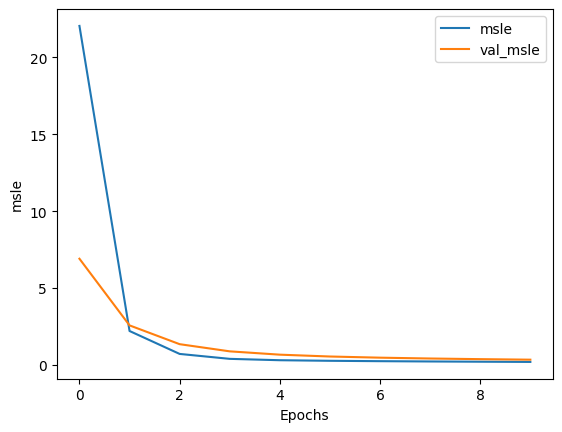

In [18]:
# Loss: MSLE | Learnin Rate: 1e-02
model = create_model()
model.compile(
    loss='msle',
    optimizer=Adam(learning_rate=1e-2),
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

Epoch 1/10
213/213 [==============================] - 2s 5ms/step - loss: 131.6477 - msle: 131.6477 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 3/10
213/213 [==============================] - 1s 6ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 4/10
213/213 [==============================] - 1s 5ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 5/10
213/213 [==============================] - 1s 5ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 

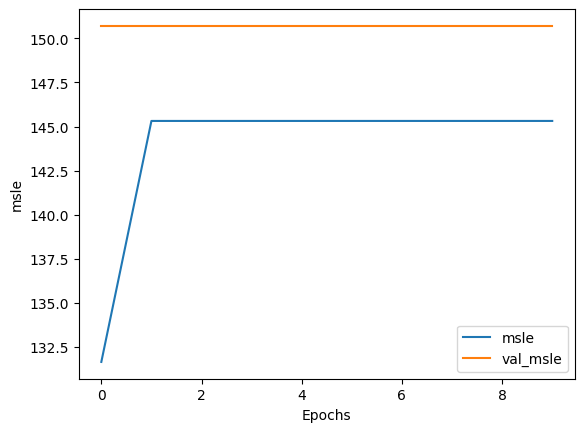

In [19]:
# Loss: MSLE | Learnin Rate: 1
model = create_model()
model.compile(
    loss='msle',
    optimizer=Adam(learning_rate=1),
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

# Exercise 1: Re-train the model to improve its performance and evaluate it on the test set

In [23]:
# Train the model
history = model.fit(
    x_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

# Evaluate the model on the test set
test_loss, test_mse = model.evaluate(x_test_scaled.values, y_test.values)
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)


Epoch 1/10
213/213 [==============================] - 3s 14ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 2/10
213/213 [==============================] - 2s 11ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 3/10
213/213 [==============================] - 2s 10ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 4/10
213/213 [==============================] - 2s 9ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 5/10
213/213 [==============================] - 2s 9ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 6/10
213/213 [==============================] - 2s 8ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 7/10
213/213 [==============================] - 1s 6ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epo

In [24]:
# Predecir en el conjunto de prueba
predictions = model.predict(x_test_scaled.values)


94/94 [==============================] - 1s 4ms/step


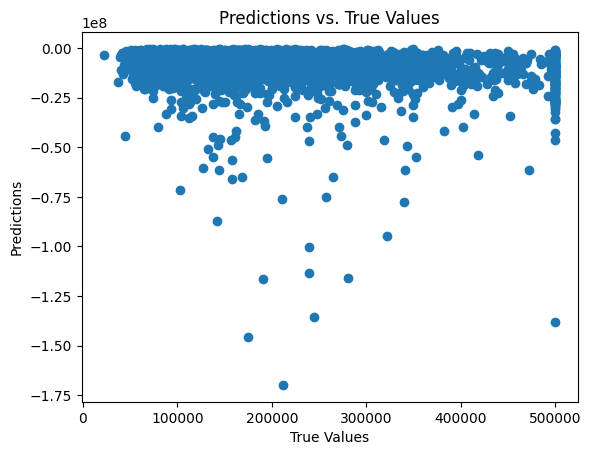

In [25]:
import matplotlib.pyplot as plt

# Visualizar las predicciones frente a las etiquetas reales
plt.scatter(y_test.values, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Values')
plt.show()
